# Mappeoppgave 1
## <u>Beskrivelse
Les oppgaveteksten nøye. Se hvordan man leverer oppgaven <th><a href='https://uit-sok-1003-h22.github.io/semesteroppgave.html'>her</a> </th> og  <th><a href='https://uit-sok-1003-h22.github.io/github.html'>her</a>. Husk at den skal leveres både som jupyter-fil og som PDF. Kommenter kodene du skriver i alle oppgaver og vær nøye på å definere aksene mm i figurer. I noen av oppgavetekstene står det hint, men det betyr ikke at de ikke kan løses på andre måter

##### For å hente denne filen til Jupyter gjør du slik:

<ol>
<li>Åpne et "terminalvindu"
<li>Gå til hjemmeområdet ditt
    
    
    [user@jupty02 ~]$ cd
<li>Lag en ny mappe på ditt hjemmeområde ved å skrive inn i terminalvinduet 

    [user@jupty02 ~]$ mkdir SOK-1003-eksamen-2022-mappe1 

<li>Gå så inn i den mappen du har laget ved å skrive

    [user@jupty02 ~]$ cd SOK-1003-eksamen-2022-mappe1 
<li> Last ned kursmateriellet ved å kopiere inn følgende kommando i kommandovinduet:

    [user@jupty02 sok-1003]$ git clone https://github.com/uit-sok-1003-h22/mappe/
</ol> 
<br> Oppgi gruppenavn m/ medlemmer på epost o.k.aars@uit.no innen 7/10, så blir dere satt opp til tidspunkt for presentasjon 19/10. 
<br>Bruk så denne filen til å gjøre besvarelsen din. Ved behov; legg til flere celler ved å trykke "b"
</br>
<hr>

## <u> Oppgavene

### Oppgave 1 (5 poeng)
a) Lag en kort fortelling i en python kode som inkluderer alle de fire typer variabler vi har lært om i kurset. Koden skal kunne kjøres med print(). Koden burde inneholde utregninger av elementer du har definert


In [100]:
#importerer pakker
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
from shapely.geometry import LineString

In [101]:
#definerer variabler av de forskjellige typene
#printer variabeltypene
x = 5 
print(type(x))
y = 7.5 
print(type(y))
z = "Kjetil"
print(type(z))
a = True
print(type(a))

print(z + " gikk en tur på " + str(x+y) + " kilometer.")
#lager en "if"-setning som printer ekstra tekst om den er sann
if a == True:
    print("Altså over 10 kilometer, ganske sprekt.")


<class 'int'>
<class 'float'>
<class 'str'>
<class 'bool'>
Kjetil gikk en tur på 12.5 kilometer.
Altså over 10 kilometer, ganske sprekt.


### Oppgave 2 (10 poeng)

Leieprisene i landet har steget de siste månedene. Ved å bruke realistiske tall<br> 
a) Lag tilbuds og etterspørselsfunksjoner for leie av bolig (Bruk av ikke-lineære funksjoner belønnes). <br>
 <br> Definer funksjonene slik at det er mulig å finne en likevekt





In [102]:
#Lager symbol av x for å bruke det matematisk
x = sp.Symbol('x')
#Supplyfunksjon
def supply(x):
    return x**2*(10000/7500)
supply(x)

1.33333333333333*x**2

In [103]:
#Demandfunksjon
def demand(x):
    return 2000000/(100+2*x)
demand(x)

2000000/(2*x + 100)

In [104]:
#finner markedslikevekt

eq = sp.Eq(supply(x), demand(x))
eq = sp.solve(eq)
likevekt = eq[0]
likevekt

76.8828085849211

In [105]:
#Viser prisen av supply og demand i likevektskvantumet
print(supply(likevekt))
print(demand(likevekt))

7881.28834120749
7881.28834120749


b) Vis at disse er henholdvis fallende og stigende, ved bruk av
- Regning
- figurativt (matplotlib) 
Husk å markere aksene tydelig og at funskjonene er definert slik at linjene krysser

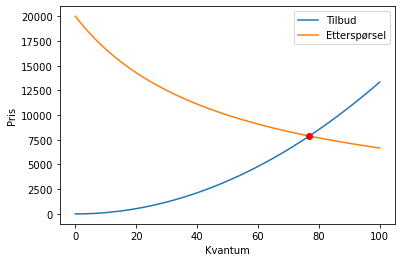

(array('d', [76.87991459551328]), array('d', [7881.920651867906]))

In [79]:
#lager en linspace for x-aksen
x = np.linspace(0,100)
#plotter supply og demand funksjonene sammen
plt.plot(x,supply(x), label='Tilbud')
plt.plot(x,demand(x),label='Etterspørsel')

plt.legend()

plt.xlabel('Kvantum')
plt.ylabel('Pris')

# finner skjæringspunkt (likevekt)kode inspirert av https://github.com/aldwin160/python/blob/master/finding%20the%20intersection%20of%20two%20curves.py
line_1 = LineString(np.column_stack((x, supply(x))))
line_2 = LineString(np.column_stack((x, demand(x))))
intersection = line_1.intersection(line_2)

plt.plot(*intersection.xy, 'ro')

plt.show()

#finner ut at likeveten ligger på (77,7881)

x,y = intersection.xy
x,y


In [62]:
##Supply ved hjelp av regning (Derivasjon)
sp.diff(supply(x))

2.66666666666667*x

In [63]:
##Demand ved hjelp av regning (Derivasjon)
sp.diff(demand(x))

-4000000/(2*x + 100)**2

c) Kommenter funksjonene og likevekten. Vis gjerne figurativt hvor likevekten er ved bruk av scatter

Text(62, 16000, 'likevekt ved (77, 7881)')

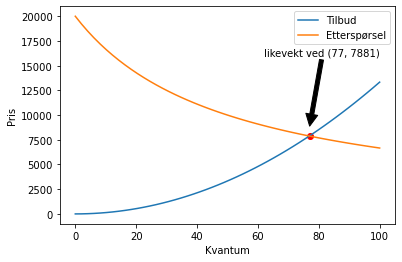

In [67]:
#Likevekten gir et kvantum på 78 og en pris på 7881kr og dette er realistisk i et fungerende marked.
#Dette er vist figurativt ved hjelp av intersection og scatter i figuren over
#De deriverte funksjonene viser at tilbudsfunksjonen øker med kvantum og etterspørsel synker med kvantum.
x = np.linspace(0,100)

ax = plt.axes()

plt.plot(x,supply(x), label='Tilbud')

plt.plot(x,demand(x),label='Etterspørsel')

plt.legend()

plt.scatter(77,7881, color="red")

plt.xlabel('Kvantum')

plt.ylabel('Pris')

ax.annotate('likevekt ved (77, 7881)', xy=(77,8881), xytext=(62, 16000), arrowprops=dict(facecolor='black'))

### Oppgave 3 (15 poeng)

SSB har omfattende data på befolkningsutvikling (https://www.ssb.no/statbank/table/05803/tableViewLayout1/). Disse dataene skal du bruke i de neste deloppgavene.

a) lag lister av følgende variabler: "Befolkning 1. januar", "Døde i alt", "Innflyttinger" og "Utflyttinger". Velg selv variabelnavn når du definerer dem i python. Første element i hver liste skal være variabelnavnet. Bruk tall for perioden 2012-2021. Lag så en liste av disse listene. Du kan kalle den "ssb". 
<br><br>
<b>Hint:</b> når du skal velge variabler på SSB sin nettside må du holde inne ctrl for å velge flere variabler.


In [83]:
#lager lister med SSB data

list1 = ["befolkning 1. januar", 4985870, 5051275,5109056,5165802,5213985,5258317,5295619,5328212,5367580, 5391369 ]

list2 = ["døde i alt", 41992,41282, 40394, 40727,40726,40774, 40840, 40684, 40611, 42002]

list3 = ["inflyttinger", 75870, 75789, 70030, 67276, 66800, 58192, 52485, 52153, 38071, 53947]

list4 = ["utflyttinger",31227,35716,31875,37474,40724,36843,34382,26826,26744,34297]

#lager en liste av listene
ssb = [list1, list2, list3, list4]

b) konverter "ssb" til en numpy matrise og gi den et nytt navn

In [84]:
#gjør disse om til en numpy-matrise
ssb1 = np.array(ssb)
ssb1

array([['befolkning 1. januar', '4985870', '5051275', '5109056',
        '5165802', '5213985', '5258317', '5295619', '5328212', '5367580',
        '5391369'],
       ['døde i alt', '41992', '41282', '40394', '40727', '40726',
        '40774', '40840', '40684', '40611', '42002'],
       ['inflyttinger', '75870', '75789', '70030', '67276', '66800',
        '58192', '52485', '52153', '38071', '53947'],
       ['utflyttinger', '31227', '35716', '31875', '37474', '40724',
        '36843', '34382', '26826', '26744', '34297']], dtype='<U21')

c) Putt alle tallene inn i en egen matrise og konverter disse til int 

In [86]:
#slicer ut tittel på listene, slik at vi bare har tall igjen og kan konvertere til int
ssb2 = ssb1[:,1:]
ssbtall = ssb2.astype(int)
ssbtall

array([[4985870, 5051275, 5109056, 5165802, 5213985, 5258317, 5295619,
        5328212, 5367580, 5391369],
       [  41992,   41282,   40394,   40727,   40726,   40774,   40840,
          40684,   40611,   42002],
       [  75870,   75789,   70030,   67276,   66800,   58192,   52485,
          52153,   38071,   53947],
       [  31227,   35716,   31875,   37474,   40724,   36843,   34382,
          26826,   26744,   34297]])

d) vis befolkningsutviklingen grafisk for de gjeldene årene ved bruk av matplotlib, og mer spesifikt "fig, ax = plt.subplots()". Vis befolkning på y-aksen i millioner

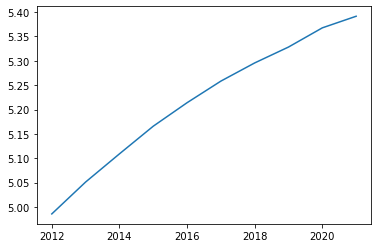

In [106]:
#henter variabelen "befolkning" fra dataen og plotter denne i millioner over de relevante årene
befolkning = ssbtall[0]
year = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
x = year
y = befolkning/1000000
fig, ax = plt.subplots()
ax.plot(x,y)

e) Lag det samme plottet ved bruk av oppslag. Hva er fordelen med dette?

Text(0.5, 0, 'År')

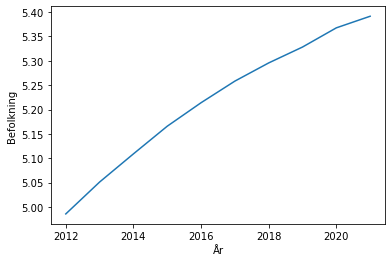

In [107]:
#lager samme plot med dictionaries
#fordelen med oppslag er at vi kan assosiere en rekke verdier med kun en key
a=dict()
a['befolkning1']=befolkning/1000000
a['year1'] = np.array(year)

plt.plot(a['year1'],a['befolkning1'])
plt.ylabel('Befolkning')
plt.xlabel('År')

f) Hva er den relative befolkningstilveksten utenom fødsler (dvs. innvandring/utvandring)? Definer en ny array og legg den til i oppslaget du laget i oppgaven tidligere. Kall den "rel_immigration". Plot denne sammen med grafen du laget i (d). 

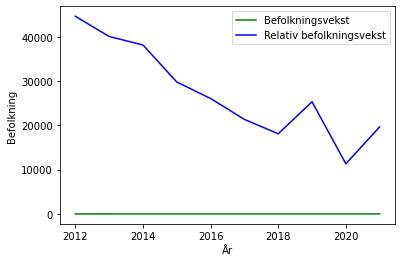

In [108]:
#definerer relativ befolkningsvekst som variabel av innvandring og utvandring
#Legger dette til i oppslaget
#plotter dette inn i figuren fra forrige oppgave

innvandring = np.array(ssbtall[2])
utvandring = np.array(ssbtall[3])
a['rel.befolkningsvekst'] = innvandring - utvandring
plt.plot(a['year1'],a['befolkning1'], color = 'green', label="Befolkningsvekst")
plt.plot(a['year1'],a['rel.befolkningsvekst'], color = 'blue', label="Relativ befolkningsvekst") 
plt.ylabel('Befolkning')
plt.xlabel('År')
plt.legend()

g) ekstrapoeng. Kan plotte de samme tallene (dvs "rel_immigration" og "befolkning" sammen med år) i to figurer ved siden av hverandre ved bruk av "fig, (ax1, ax2) = plt.subplots(1, 2)". Gi grafene ulik farge


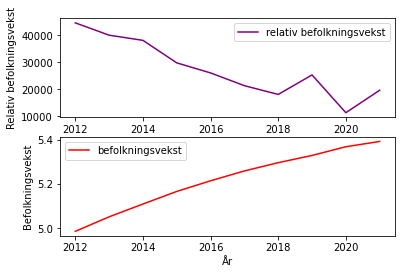

In [109]:
#plotter den samme dataen i forskjellige plot ved hjelp av "subplots"
innvandring = np.array(ssbtall[2])
utvandring = np.array(ssbtall[3])
a['rel.befolkningsvekst'] = innvandring - utvandring
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(a['year1'],a['rel.befolkningsvekst'], color = "purple", label="relativ befolkningsvekst")
ax2.plot(a['year1'],a['befolkning1'], color = "red", label="befolkningsvekst")
ax2.set_xlabel("År")
ax1.set_ylabel("Relativ befolkningsvekst")
ax2.set_ylabel("Befolkningsvekst")
ax1.legend()
ax2.legend()

## Oppgave 4 (20 poeng)

Et lån består som regel av et månedlig terminbeløp. Dette beløpet er summen av avdrag (nedbetalingen på lånet) og renter. Vi antar månedlig forrenting i alle oppgavene. Dvs. at det er 12 terminer i hvert år.<br><br>
a) Lag en funksjon som regner ut hvor mye lånet "x" koster deg i renteutgifter for "t" terminer med årlig rente "r" for et serielån. <br> <br>  Siden dette er et serielån, så vil avdragene være like hver måned men renteutgiftene reduseres i takt med avdragene. Renteutgiftene for en gitt termin "t" vil derfor være den årlige renten "r" (delt på antall forrentinger "f") på gjenværende beløp på det tidspunktet.   $renteutgifter_{t} = (x-a*t)*{r/f}$   <br>  <br> 
Siden vi er ute etter den totale kostnaden i svaret, må du summere renteutgiftene over alle terminer, det vil si $\sum_{t=1}^N(x-a*t)*{r/f}$


<br>
<b>Hint:</b> siden terminbeløpet varierer for hver måned (pga at rentene endres), må alle enkeltperioder summeres. Det kan være nyttige å bruke funksjonen np.arange() til dette.


In [110]:
#definerer variabler og funksjonen for renteutgifter
x=1000000
f=12
a = x/f
t=12
r=0.03



def renteutgifter(x,a,t,r,f):
    return (x-a*np.arange(t))*r/f

#finner renteutgifter for et år
sum(renteutgifter(x,a,t,r,f))

16250.0

b) regn ut hvor mye lånet koster deg med henholdsvis 10, 20 og 30 års tilbakebetaling. Anta 1 000 000 kr lånebeløp med 3% rente

In [111]:
#finner lånekostnaden for 10 år
t1=t*10
a=x/t1
print(sum(renteutgifter(x,a, t1, r, f)))

151250.0


In [112]:
#finner lånekostnaden for 20 år
t2=t*20
a=x/t2
print(sum(renteutgifter(x,a, t2, r, f)))


301250.0


In [113]:
#finner lånekostnaden for 30 år
t3=t*30
a=x/t3
print(sum(renteutgifter(x,a, t3, r, f)))


451250.0


c) Vis hva det samme lånet koster som annuitetslån, dvs differansen mellom alle terminbeløp og lånebeløp.<br> <br> Annuitetslån gir like terminbeløp hver måned, men renten utgjør en større del av dette beløpet i starten. Terminbeløpet for et annuitetslån er definert ved formelen:
$T = x*\frac{r/f} {(1-(1+(r/f))^{-t})}$, hvor x=lånebeløp, r = årlig rente, t = terminer, f= antall forrentinger





In [114]:
#definerer funksjon for terminbeløp
def terminbeløp(x,r,f,t):
    return x*(r/f)/(1-(1+(r/f))**-t)
#finner kostnaden for et år 
terminbeløp(1000000,0.03,12,12)

84693.69875849057

In [115]:
#definerer en funksjon som gir oss prisen av et lån som en funksjon av terminbeløpformelen ganget med antall
#forrentinger og minuser dette med den originale låneprisen
#bruker denne til å finne kostnaden for 1 år
def lånekostnad(x,r,f,t,L,T1):
    return terminbeløp(x,r,f,t)*T1-L
lånekostnad(1000000,0.03,12,12,1000000,12)

16324.385101886932

c) Vis hvordan utviklingen i rentekostnader og avdrag på terminer for serielån grafisk ved hjelp av stackplot funksjonen i matplotlib. Anta et bankinnskudd x = 1 000 000 kr, årlig rente r=3% og antall terminer t = 240 (det vil si 20 år). Siden vi må vise utviklingen per termin, husk at "t" også definerer hvilken måned vi er i. Dvs, hvis t=15, har det gått 1 år og 3 mnd med terminer. Se forøvrig relevante formler i oppgave (a) 

<br> 

<b>Hint1:</b> Siden avdragene er like for alle måneder, kan det være lurt å definere det månedlige avdraget som en liste og gange det med antall perioder. </br>
<b>Hint2:</b> Siden vi er ute etter både rentekostnader og avdrag hver for seg, kan det være lurt å definere en funksjon for hver av dem. </br>


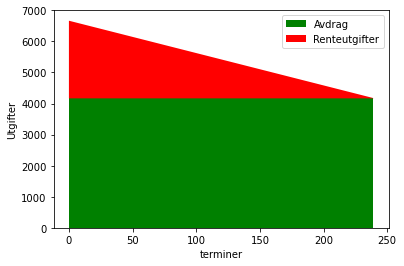

In [116]:
#Definerer serielån ved hjelp av funksjonen fra tidligere og setter inn relevante verdier
serielån = renteutgifter(1000000,4167, 240, 0.03, 12)
terminer = np.array(range(240))
#lager liste for avdrag
avdrag = []
#lager "for"-løkke som setter inn like avdragsbeløp for 240 perioder inn i listen
for i in range(240):
    avdrag.append(4167)
plt.xlabel('terminer')
plt.ylabel('Utgifter')
#lager stackplot
plt.stackplot(terminer, avdrag, serielån, colors=['green','red'], labels=["Avdrag","Renteutgifter"])
plt.legend()